# Homework 1
## ROB-GY 6333 Swarm Robotics
## Alejandro Ojeda Olarte

In [49]:
import numpy as np
import scipy
A = np.array([[0 ,1 ,0 ,0 ,0], [1 ,0 ,1 ,0, 0],[  0 ,1, 0, 1, 1], [ 0, 0, 1, 0, 1], [ 0 ,0 ,1 ,1 ,0]])

A1 = np.array([[1 ,0 ,1 ], [0 ,1 ,0],[ 1, 0, 1], [ 1, 1, 0]])

A2 = np.array([[1 ,0 ,1 ], [0 ,1 ,0],[ 1, 1, 0], [ 1, 0, 1]])

A3 = np.array([[0 ,1 ,2 ,1], [1 ,0 ,1 ,1],[  0 ,1, 0, 1]])

A4 = np.array([[-1 ,0 ,1 ], [0 ,1 ,0],[ 1, 1, -1]])

1. What is the rank of the matrix?

In [50]:
np.linalg.matrix_rank(A1)
# All 3 columns are linearly independent, so the rank is 3


3

In [51]:
np.linalg.matrix_rank(A2)
#Given it has only 3 elements per row, the rank is 3, the most it can generate


3

In [52]:
np.linalg.matrix_rank(A3)
#One of the columns can be generated by the other 3, so the rank is 3

3

In [53]:
np.linalg.matrix_rank(A4)
#The first column can be generated by multiplying the first one, so the rank is 2

2

2. Nullspace matrix dimension

In [54]:
import scipy.linalg


scipy.linalg.null_space(A1).size
#scipy.linalg.orth(A1)


0

In [55]:
scipy.linalg.null_space(A2).size
#scipy.linalg.orth(A2)

0

In [56]:
scipy.linalg.null_space(A3).size
scipy.linalg.orth(scipy.linalg.null_space(A3))

array([[-5.77350269e-01],
       [-5.77350269e-01],
       [-1.38824395e-16],
       [ 5.77350269e-01]])

In [57]:
scipy.linalg.null_space(A4).size
scipy.linalg.orth(scipy.linalg.null_space(A4))

array([[ 7.07106781e-01],
       [-6.91153972e-17],
       [ 7.07106781e-01]])

## Excercise 2

In [58]:
A1 = np.array([[0 ,1 ,0 ,2 ,3], [1 ,0 ,0 ,3, 2],[  3,-1, 0, 2, 3], [ 1, -1, 3, 0, 4], [ -2 ,1 ,-2 ,-2 ,3]])
A2 = np.array([[0 ,2 ,3 ,3 ,1], [2 ,0 ,-1 ,2, 3],[  3,-1, 0, 5, 1], [ 3, 2, 5, 0, 2], [ 1 ,3 ,1 ,2 ,6]])

eigenvalues1, eigenvectors1=np.linalg.eig(A1)
print("Real Values")
print(eigenvalues1.real)
print("Complex Values")
print(eigenvalues1.imag)


Real Values
[ 3.06233365  3.06233365 -2.07186986 -0.52639872 -0.52639872]
Complex Values
[ 4.19657394 -4.19657394  0.          1.3000279  -1.3000279 ]


In [59]:
print("Matrix 2")
eigenvalues2, eigenvectors2=np.linalg.eig(A2)
print("Real Values")
print(eigenvalues2.real)
print("Complex Values")
print(eigenvalues2.imag)

Matrix 2
Real Values
[ 1.02121231e+01  4.68532852e+00  3.93056974e-16 -3.00340298e+00
 -5.89404863e+00]
Complex Values
[0. 0. 0. 0. 0.]


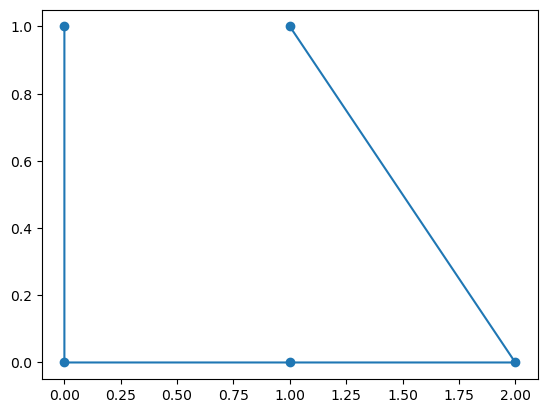

In [60]:

# Define degree matrix
D = np.diag([1, 2, 3, 2, 2])

# Define Laplacian matrix
L = D - A

# Show graph

XYCoords_0 = np.array([[0 ,1],[ 0, 0],[ 1, 0],[ 2, 0],[ 1, 1]])

XCoords_0 = XYCoords_0[:,0]
YCoords_0 = XYCoords_0[:,1]

import matplotlib.pyplot as plt
plt.plot(XCoords_0,YCoords_0,'o',linestyle='-')

#figure(1); gplot(A,XYCoords_0,'-o'); axis([-1 3 -1 2])

In [61]:
import scipy
import scipy.integrate
import scipy.optimize

def func(t,x):
    A = np.array([[0 ,1 ,0 ,0 ,0], [1 ,0 ,1 ,0, 0],[  0 ,1, 0, 1, 1], [ 0, 0, 1, 0, 1], [ 0 ,0 ,1 ,1 ,0]])
    # Define degree matrix
    D = np.diag([1, 2, 3, 2, 2])

    # Define Laplacian matrix
    L = D - A
    return -L*x

solX = scipy.integrate.odeint(lambda x,t: -L.dot(x), XCoords_0, [0,15])

#[t_X,XCoords_t] =scipy.integrate.solve_ivp(func, (0, 15), XCoords_0)
#[t_X,XCoords_t] =scipy.integrate.odeint(func, XCoords_0, [0, 15])


## Excercise 3

For this case, there exists two possibilities based on the statement.  

>Due to terrain conditions, wheeled robots can _only_ communicate to _each other_ inside the same team and cannot communicate with wheeled robots or the drone of a different team.

The first possibility is that it mentions that it can conly communicate with each other, therefore it cannot communicate back to the drone in it's team, so the graph would be a directed graph.

The second possibility, is that given that the drone is able to communicate with its own team, but there is not explicit statement that the mobile robot cannot send messages back to the drone, leaves the opportunity to assume it is an undirected graph.

### Sets
Undirected

$V= \{ v_1,v_2,v_3,v_4,v_5,v_6 \}$

$E=\{ (v_1,v_2),(v_1,v_3),(v_3,v_2),(v3,v_4),(v_4,v_5),(v_4,v_6),(v_5,v_6) \}$

Directed

$V= \{ v_1,v_2,v_3,v_4,v_5,v_6 \} \\$

$E=\{ (v_1,v_2),(v_2,v_1),(v_3,v_1),(v_3,v_2),(v3,v_4),(v_4,v_3),(v_4,v_5),(v_4,v_6),(v_5,v_6),(v_6,v_5) \}$

### Graphs

Directed:

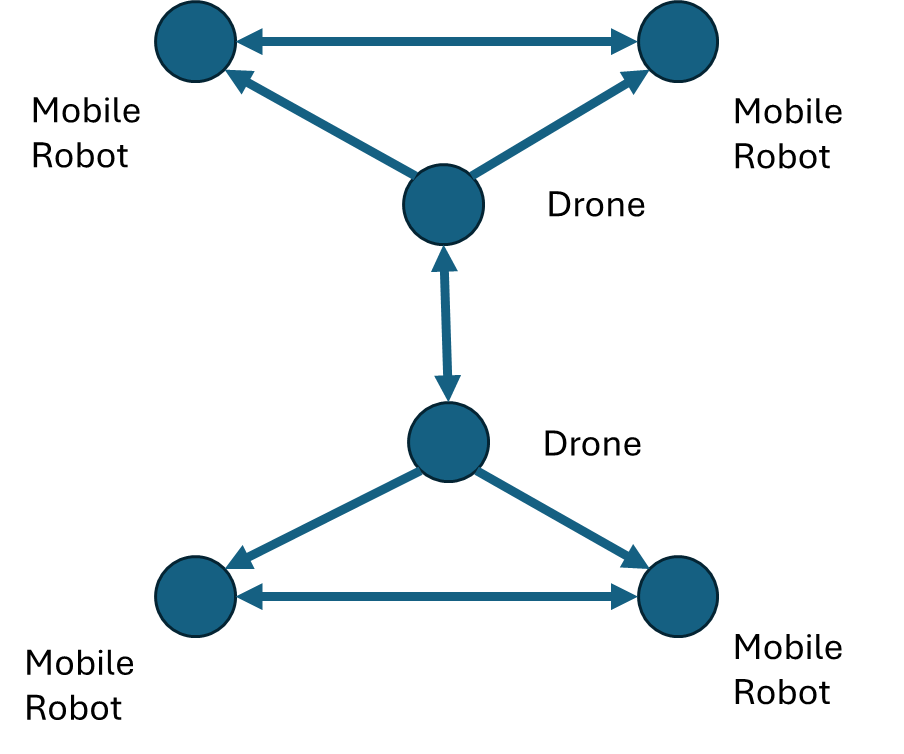


Undirected:

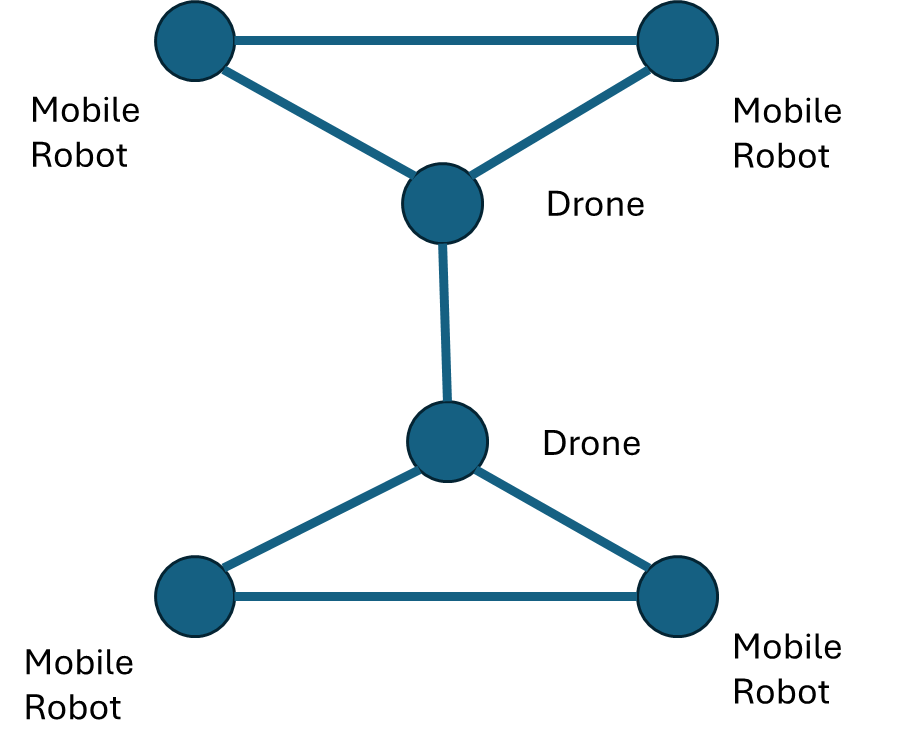


### Connected

Undirected: It is connected as all robots havea route to reach any other robot.

Directed: It is weakly connected as all vertexes have a connection, but not strongly connected as you can't go from a mobile robot to the drone.

### Adjacency Matrix

In [62]:
print("Undirected Graph")
UndicAdj=np.array([[0 ,1 ,1 ,0 ,0,0], [1 ,0 ,1 ,0, 0,0],[  1 ,1, 0, 1, 0,0], [ 0, 0, 1, 0, 1,1], [ 0 ,0 ,0 ,1 ,0,1],[0 ,0 ,0 ,1 ,1,0]])
print(UndicAdj)

print("Directed Graph")
DicAdj=np.array([[0 ,1 ,0 ,0 ,0,0], [1 ,0 ,0 ,0, 0,0],[  1,1, 0, 1, 0,0], [ 0, 0, 1, 0, 1,1], [ 0 ,0 ,0 ,0 ,0,1],[0 ,0 ,0 ,0 ,1,0]])
print(DicAdj)

Undirected Graph
[[0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 0 1 0 0]
 [0 0 1 0 1 1]
 [0 0 0 1 0 1]
 [0 0 0 1 1 0]]
Directed Graph
[[0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 1 0 1 0 0]
 [0 0 1 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]]


### Degree Matrix

In [63]:

print("Directed Degree")
DicDegree=np.array([[2 ,0 ,0 ,0 ,0,0], [0 ,2 ,0 ,0, 0,0],[  0 ,0, 1, 0, 0,0], [ 0, 0, 0, 1, 0,0], [ 0 ,0 ,0 ,0 ,2,0],[0 ,0 ,0 ,0 ,0,2]])
print(DicDegree)

print("Undirected Degree")
UndicDegree=np.array([[2 ,0 ,0 ,0 ,0,0], [0 ,2 ,0 ,0, 0,0],[  0 ,0, 3, 0, 0,0], [ 0, 0, 0, 3, 0,0], [ 0 ,0 ,0 ,0 ,2,0],[0 ,0 ,0 ,0 ,0,2]])
print(UndicDegree)

Directed Degree
[[2 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]
Undirected Degree
[[2 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


### Incidence
For the undirected case.
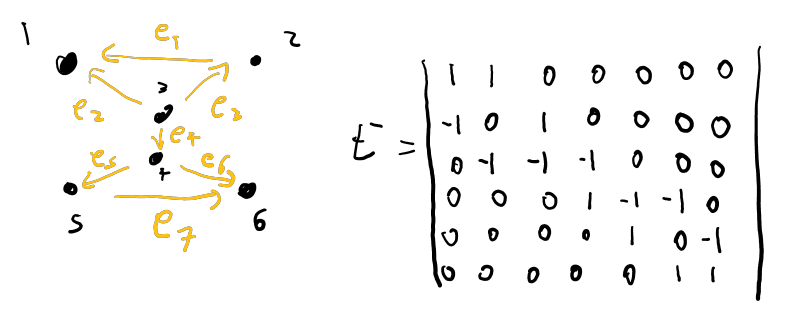

### Laplacian

In [64]:
print("Directed Laplacian")
DicLaplacian=DicDegree-DicAdj
print(DicLaplacian)

print("Undirected Laplacian")
UndicLaplacian=UndicDegree-UndicAdj
print(UndicLaplacian)

Directed Laplacian
[[ 2 -1  0  0  0  0]
 [-1  2  0  0  0  0]
 [-1 -1  1 -1  0  0]
 [ 0  0 -1  1 -1 -1]
 [ 0  0  0  0  2 -1]
 [ 0  0  0  0 -1  2]]
Undirected Laplacian
[[ 2 -1 -1  0  0  0]
 [-1  2 -1  0  0  0]
 [-1 -1  3 -1  0  0]
 [ 0  0 -1  3 -1 -1]
 [ 0  0  0 -1  2 -1]
 [ 0  0  0 -1 -1  2]]


In [65]:
eigenVal=np.linalg.eigvals(UndicLaplacian)
np.round(eigenVal,2)

array([4.56, 0.  , 0.44, 3.  , 3.  , 3.  ])

Given that only one of its eigenvalues is zero, it is a connected graph.

## Excercise 4



In [66]:
L1=np.array([(2,-1,-1,0),(-1,1,0,0),(-1,0,2,-1),(0,0,-1,1)])
L2=np.array([(2,-1,-1,0),(-1,1,0,0),(-1,0,2,-1),(0,0,-1,1)])
L3=np.array([(3,0,-1,-1,-1),(0,2,0,-1,-1),(-1,0,2,-1,0),(-1,-1,-1,3,0),(-1,-1,0,0,2)])
L4=np.array([(2,0,-1,-1,-1),(0,1,0,-1,-1),(-1,0,2,-1,0),(-1,-1,-1,3,0),(-1,-1,0,0,2)])
L5=np.array([(2,0,-1,-1,0),(0,1,0,0,-1),(-1,0,2,-1,0),(-1,0,-1,2,0),(0,-1,0,0,1)])

np.sum(L1,axis=1)

array([0, 0, 0, 0])

In [67]:
np.sum(L2,axis=1)

array([0, 0, 0, 0])

In [68]:
np.sum(L3,axis=1)

array([0, 0, 0, 0, 0])

In [69]:
np.sum(L4,axis=1)

array([-1, -1,  0,  0,  0])

Given that its columns do not add up to 0, L4 can't be a Laplacian.

In [70]:
np.sum(L5,axis=1)

array([0, 0, 0, 0, 0])

## Graphs
a.
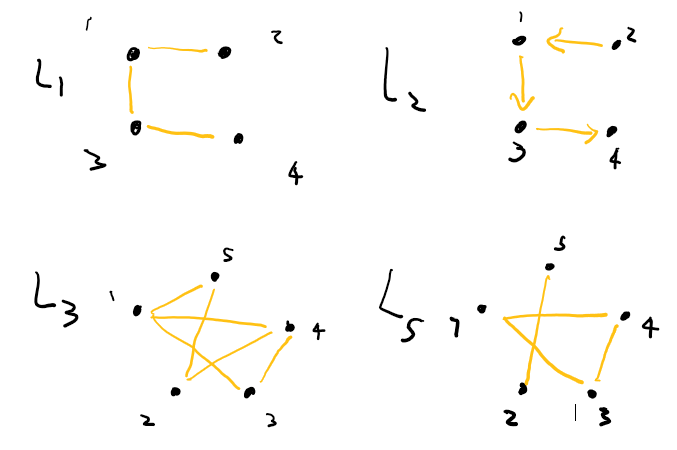

b. Graph L1 and L3 are connected, but L5 is not, as its vertex and 5 are isolated from the rest. L2 is weakly connected as there is only one route to get from 2 to 4, but no way back.

c. L1 and L3 should have exactly one 0 eigenvalue and all be positive. L2 may have complex and multiple zeros. L2 should be all non negative, but may have more than 1 or no zero.

In [71]:
np.round(np.linalg.eigvals(L1),2)


array([ 3.41,  2.  , -0.  ,  0.59])

In [75]:
np.linalg.eigvals(L2)

array([ 3.41421356e+00,  2.00000000e+00, -1.97366860e-16,  5.85786438e-01])

In [73]:
np.round(np.linalg.eigvals(L3),2)

array([-0.  ,  4.62,  3.62,  2.38,  1.38])

In [74]:
np.round(np.linalg.eigvals(L5),2)

array([ 3., -0.,  0.,  2.,  3.])